# Data Analysis Project 6: Graphing Video Game Sales
You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.

Import:
- Pandas
- Matplotlib
- Seaborn
- CSV data

In [740]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
games = pd.read_csv('top100videogamesales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Question 1

Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

### Strategy
- Group the publishers and sum the sales for each region.

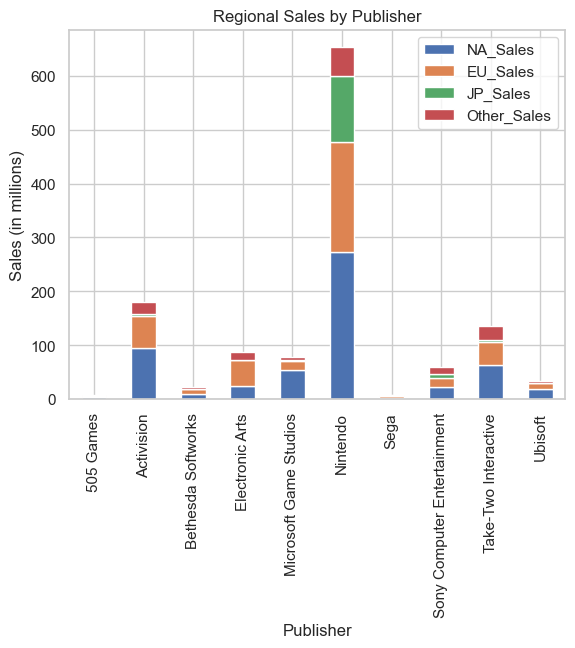

In [741]:
sales_by_publisher = games.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

sales_by_publisher.set_index('Publisher').plot(kind='bar', stacked=True)
plt.title('Regional Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Sales (in millions)')
plt.show()


### Analysis
Nintendo has a strong lead in the North American market, the European market, the Japanese market, and Other markets.
Activison is a far away second in the North American market, European market.
Activision and Take-Two Interactive are both closer seconds in Other markets.

## Question 2
Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

### Strategy
- Group the data by year and sum the 'Global_Sales'.

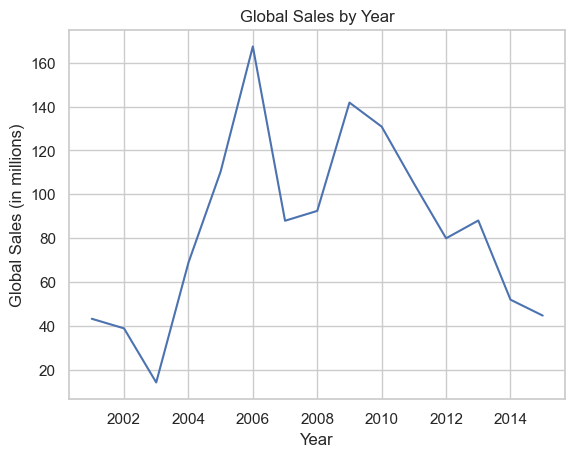

In [742]:
sales_by_year = games.groupby('Year')['Global_Sales'].sum().reset_index()

plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'])
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

### Analysis
The global game sales between 2002 and 2014 have been volatile with peaks and troughs. Sales dropped to an all time low in 2003, peaked in 2006, dipped in 2007, rose to the second peak in 2009, then continually declined until 2014 where it was very nearlly at 2002 levels. 

## Question 3
Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

### Strategy
- Filter the dataframe for only action games.
- Use Seaborn to display them by 'Global_Sales'

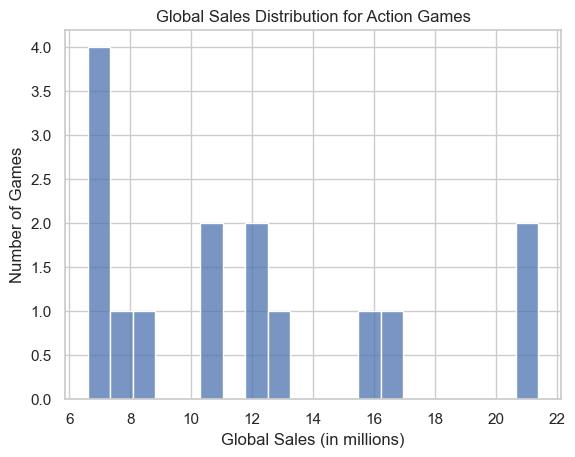

In [743]:
action_games = games[games['Genre'] == 'Action']

sns.histplot(data=action_games, x='Global_Sales', bins=20)
plt.title('Global Sales Distribution for Action Games')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.show()

### Analysis
There are 15 Action games total in the data. 4 of them sold 7 million, while only 2 sold as high as 21 million. Amongst the other 9, 2 sold arround 8, 2 sold arround 16, and 1 sold arround 13. There are 2 sets of 2 games that had similar sales at just over 10 million and 12 million.

## Question 4
North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.


### Strategy
- Sum 'NA_Sales' by 'Genre' and sort in descending order
- Calculate the sum for all game sales 'total_sales'
- Set the 'Other' category threshold at 5% of 'total_sales'
- Create a list of what genres are in the 'Other' category
- Sum the sales of games bellow the threshold into 'other_sales' and aggregate into a single value
- Filter for genres with sales equal to or above the threshold
- Add 'Other' to the list of genres

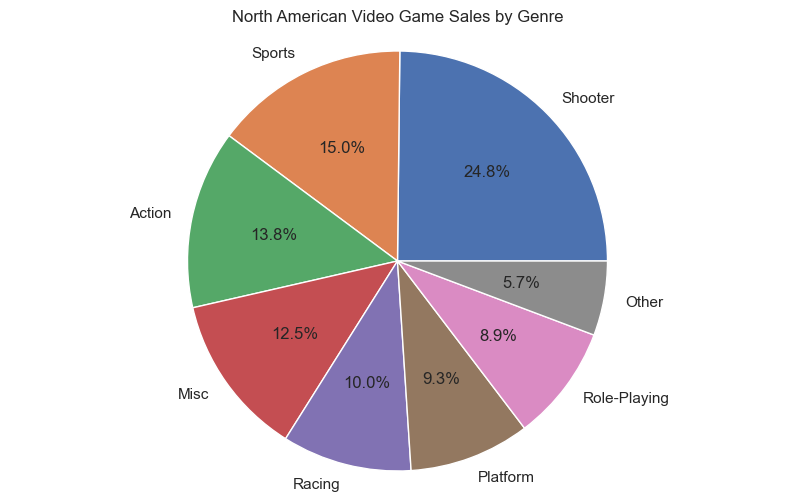

Genres included in 'Other' are: Simulation, Fighting, Puzzle.


In [744]:
sales_by_genre = games.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
total_sales = sales_by_genre.sum()
threshold = 0.05 * total_sales
genres_below_threshold = sales_by_genre[sales_by_genre < threshold].index.tolist()
other_sales = sales_by_genre[sales_by_genre < threshold].sum()
sales_by_genre = sales_by_genre[sales_by_genre >= threshold]
sales_by_genre['Other'] = other_sales

plt.figure(figsize=(10, 6))
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.1f%%')
plt.title('North American Video Game Sales by Genre')
plt.axis('equal')
plt.show()

print(f"Genres included in 'Other' are: {', '.join(genres_below_threshold)}.")


### Anaylsis
The largest genre of video games sold in North America is Shooters. With a 9.8% gap coming in second is Sports. What stands out is the Misc genre at 12.5% is not clearly defined and has a much higher market share than the Other category.